In [43]:
import os
import random
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# store the dataset in dataframe

In [44]:
#get img_id & img_path & category name and id

data_path = "UECFOOD100"

data_list = []

category_file_path = os.path.join(data_path, "category.txt")
category_df = pd.read_csv(category_file_path, sep='\t', index_col='id')

if not category_df.empty:
    # loop through each folder
    for folder_id_str in os.listdir(data_path):
        try:
            folder_id = int(folder_id_str)
            folder_path = os.path.join(data_path, folder_id_str)
            if os.path.isdir(folder_path):
                # loop through imgs in each folder
                img_folder_path = folder_path
                for img_filename in os.listdir(img_folder_path):
                    if img_filename.endswith(".jpg"):

                        img_id = int(os.path.splitext(img_filename)[0])

                        img_path = os.path.join(img_folder_path, img_filename)#get img path

                        if folder_id in category_df.index:
                            category = category_df.loc[folder_id, 'name']
                            category_id = folder_id

                            data_list.append({
                                "img_id": img_id,
                                "img_path": img_path,
                                "category": category,
                                "category_id": category_id
                            })
        except ValueError:
            print(f"skip other folders: {folder_id_str}")

    data_df = pd.DataFrame(data_list)
    csv_output_path = "data_info.csv"
    data_df.to_csv(csv_output_path, index=False)


skip other folders: category.txt
skip other folders: category_ja_euc.txt
skip other folders: category_ja_sjis.txt
skip other folders: category_ja_utf8.txt
skip other folders: multiple_food.txt
skip other folders: README.txt


In [45]:
data_path = "UECFOOD100"

# Load the existing CSV with image data
csv_path = "data_info.csv"
data_df = pd.read_csv(csv_path)
# Loop through each folder in UEFOOD100
for folder_id_str in os.listdir(data_path):
    try:
        folder_id = int(folder_id_str)
        folder_path = os.path.join(data_path, folder_id_str)

        if os.path.isdir(folder_path):
            # Specify the path for the bounding box file (bb_info.txt)
            bb_info_file_path = os.path.join(folder_path, "bb_info.txt")

            if os.path.exists(bb_info_file_path):
                try:
                    # Read the bounding box data from bb_info.txt
                    bb_info_df = pd.read_csv(bb_info_file_path, sep=' ', index_col=0, header=0, names=["x1", "y1", "x2", "y2"])

                    # Loop through rows in bb_info_df to assign bounding box coordinates
                    for img_id, bbox_info in bb_info_df.iterrows():
                        img_id = int(img_id)

                        # Create the correct image path pattern
                        pattern = f'UECFOOD100\\{folder_id}\\{img_id}.jpg'

                        # Find the matching rows in data_df based on img_path
                        matching_rows = data_df[data_df['img_path'] == pattern]

                        # Update the data_df with bounding box coordinates
                        data_df.loc[matching_rows.index, ["x1", "y1", "x2", "y2"]] = [bbox_info["x1"], bbox_info["y1"], bbox_info["x2"], bbox_info["y2"]]

                except pd.errors.EmptyDataError:
                    print(f"No data found in {bb_info_file_path}")
            else:
                print(f"bb_info.txt file not found in {folder_path}")

    except ValueError:
        print(f"Skipping invalid folder: {folder_id_str}")

# Save the updated data_df with bounding boxes
data_df.to_csv(csv_path, index=False)

Skipping invalid folder: category.txt
Skipping invalid folder: category_ja_euc.txt
Skipping invalid folder: category_ja_sjis.txt
Skipping invalid folder: category_ja_utf8.txt
Skipping invalid folder: multiple_food.txt
Skipping invalid folder: README.txt


In [46]:
data=pd.read_csv("data_info.csv")
data['category_id']=data['category_id']-1
data.head()

,img_id,img_path,category,category_id,x1,y1,x2,y2
0,1,UECFOOD100\1\1.jpg,rice,0,0.0,143.0,370.0,486.0
1,10,UECFOOD100\1\10.jpg,rice,0,71.0,16.0,478.0,328.0
2,10572,UECFOOD100\1\10572.jpg,rice,0,0.0,49.0,360.0,420.0
3,10586,UECFOOD100\1\10586.jpg,rice,0,19.0,69.0,355.0,372.0
4,10617,UECFOOD100\1\10617.jpg,rice,0,0.0,4.0,91.0,246.0


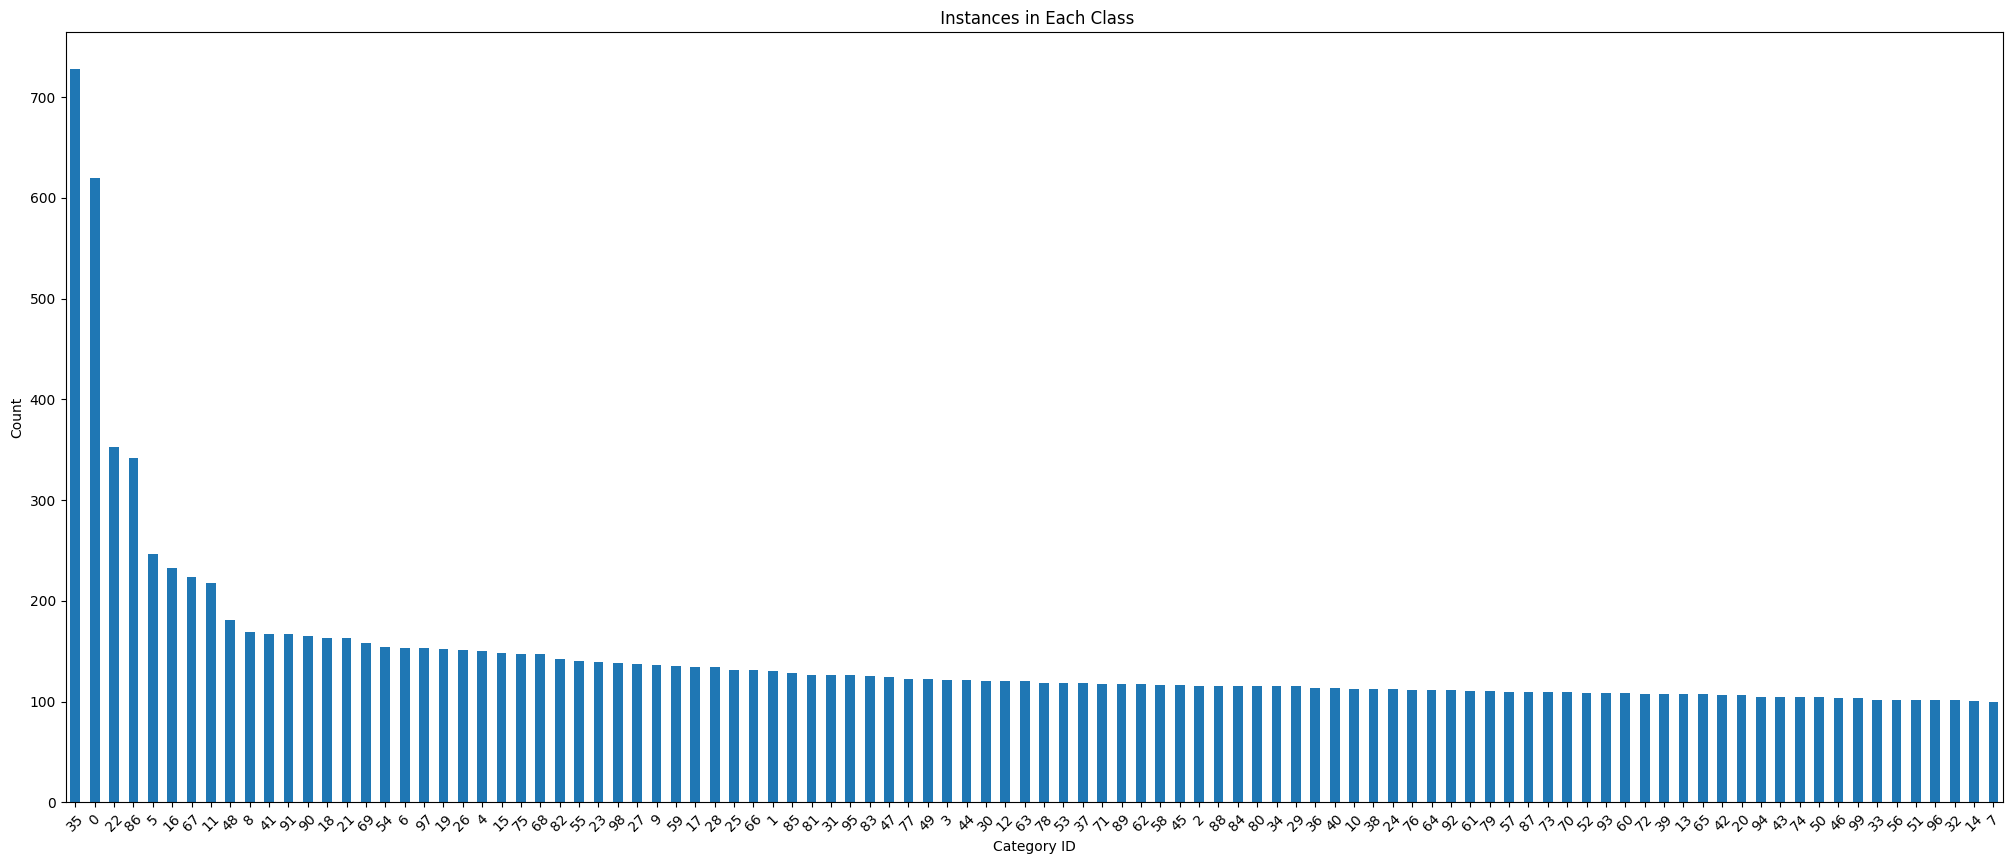

In [47]:
category_counts = data['category_id'].value_counts()
plt.figure(figsize=(25, 10))
category_counts.plot(kind='bar')
plt.title(' Instances in Each Class')
plt.xlabel('Category ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [48]:
len(data)

14361

In [49]:
data.to_csv('balanced.csv', index=False)

In [50]:
df = pd.read_csv('balanced.csv')

merged_df = df.groupby('img_id', as_index=False).agg({
    'img_path': 'first',
    'category': lambda x: ','.join(x),
    'category_id': lambda x: ','.join(map(str, x)),
    'x1': lambda x: ','.join(map(str, x)),
    'y1': lambda x: ','.join(map(str, x)),
    'x2': lambda x: ','.join(map(str, x)),
    'y2': lambda x: ','.join(map(str, x))
})

merged_df.to_csv('multiple_data.csv', index=False)


In [51]:
df = pd.read_csv("multiple_data.csv")
df.head(10)

,img_id,img_path,category,category_id,x1,y1,x2,y2
0,1,UECFOOD100\1\1.jpg,"rice,jiaozi","0,41","0.0,363.0","143.0,91.0","370.0,800.0","486.0,560.0"
1,2,UECFOOD100\1\2.jpg,rice,0,20.0,208.0,582.0,559.0
2,3,UECFOOD100\1\3.jpg,rice,0,2.0,110.0,243.0,410.0
3,4,UECFOOD100\1\4.jpg,rice,0,0.0,237.0,286.0,536.0
4,5,UECFOOD100\1\5.jpg,rice,0,8.0,28.0,761.0,585.0
5,6,UECFOOD100\1\6.jpg,rice,0,0.0,38.0,369.0,310.0
6,7,UECFOOD100\1\7.jpg,rice,0,0.0,162.0,383.0,450.0
7,8,UECFOOD100\1\8.jpg,rice,0,80.0,31.0,776.0,454.0
8,9,UECFOOD100\1\9.jpg,"rice,beef noodle","0,23","2.0,278.0","226.0,76.0","270.0,798.0","470.0,509.0"
9,10,UECFOOD100\1\10.jpg,rice,0,71.0,16.0,478.0,328.0


# split dataset

In [52]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

train_csv_path = "train_data.csv"
val_csv_path = "val_data.csv"
test_csv_path = "test_data.csv"

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [53]:
train_df.head()

,img_id,img_path,category,category_id,x1,y1,x2,y2
5131,5178,UECFOOD100\51\5178.jpg,sweet and sour pork,50,63.0,114.0,390.0,259.0
7088,7452,UECFOOD100\70\7452.jpg,cold tofu,69,9.0,31.0,126.0,138.0
2162,2180,UECFOOD100\22\2180.jpg,soba noodle,21,51.0,25.0,170.0,128.0
3788,3806,UECFOOD100\39\3806.jpg,oden,38,150.0,0.0,420.0,117.0
8769,9133,UECFOOD100\27\9133.jpg,spaghetti,26,15.0,109.0,303.0,390.0


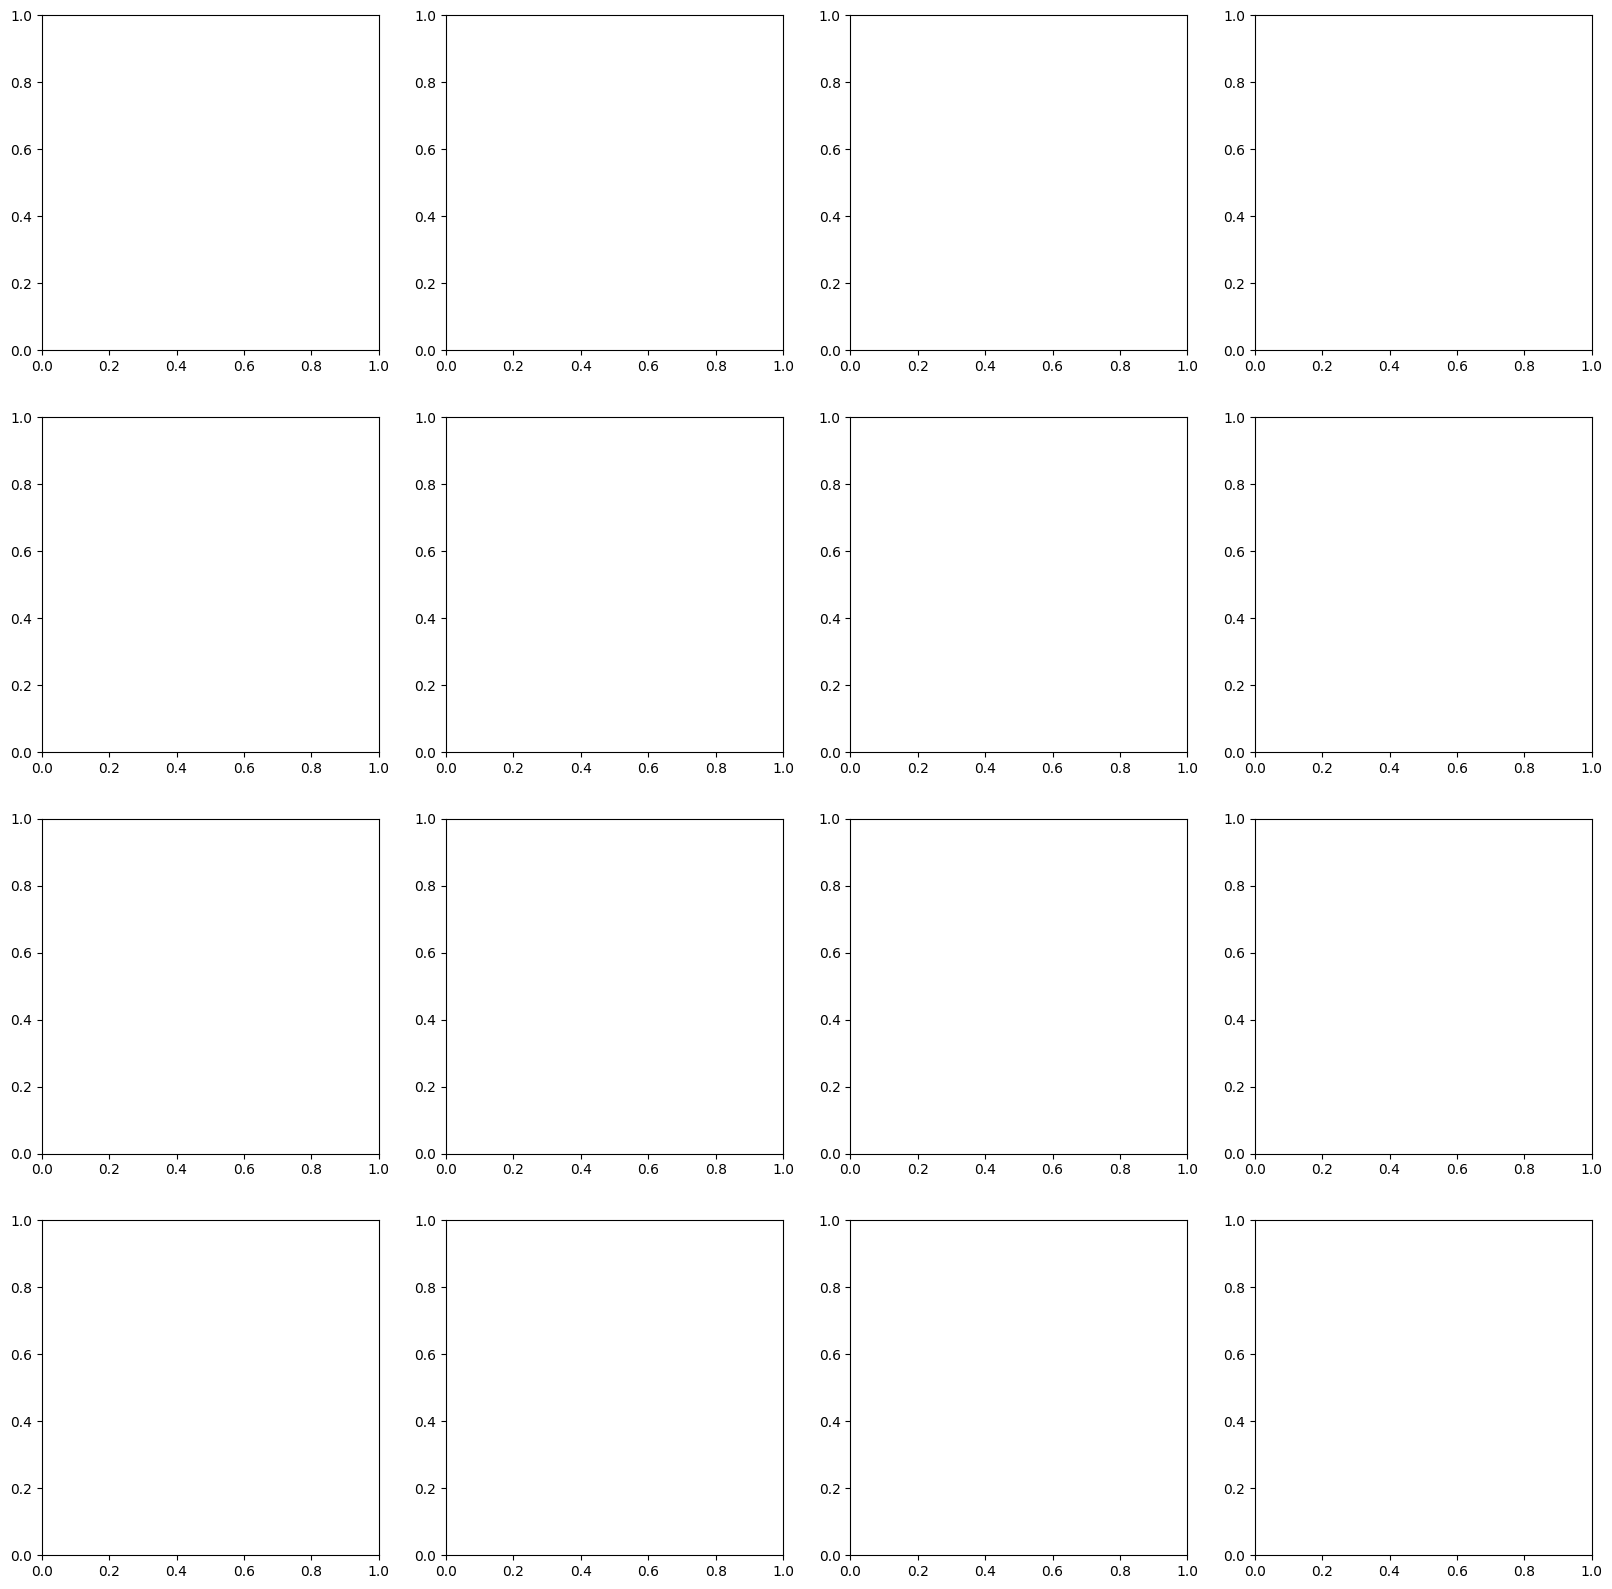

In [54]:
import numpy as np

# Set up the plot with 4x4 grid
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i, idx in enumerate(random_images):
    row = i // 4
    col = i % 4

    img_id = balanced.loc[idx, "img_id"]
    img_path = balanced.loc[idx, "img_path"]
    category_id = int(balanced.loc[idx, "category_id"])

    # Check if bounding box values are NaN and skip if they are
    if balanced.loc[idx, ["x1", "y1", "x2", "y2"]].isnull().any():
        continue  # Skip this image if any bounding box value is NaN

    x1, y1, x2, y2 = int(balanced.loc[idx, "x1"]), int(balanced.loc[idx, "y1"]), int(balanced.loc[idx, "x2"]), int(balanced.loc[idx, "y2"])

    # Load the image
    img = cv2.imread(img_path)

    # Draw bounding box on the image
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)

    # Display the image with bounding box
    axs[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [55]:
print(f"Loading image from: {img_path}")


Loading image from: UECFOOD100\56\5687.jpg


# create new paths in yolo dataset format

In [68]:
train_images = "new_data/train/images"
train_labels = "new_data/train/labels"

val_images = "new_data/val/images"
val_labels = "new_data/val/labels"

test_images = "new_data/test/images"
test_labels = "new_data/test/labels"

# train path

In [58]:
train_csv = pd.read_csv("train_data.csv")

output_folder_path = "new_data/train"
os.makedirs(output_folder_path, exist_ok=True)

images_folder_path = os.path.join(output_folder_path, "images")
labels_folder_path = os.path.join(output_folder_path, "labels")
os.makedirs(images_folder_path, exist_ok=True)
os.makedirs(labels_folder_path, exist_ok=True)

def pascal_voc_to_yolo(x1, y1, x2, y2, image_w, image_h):
    x_center = (x1 + x2) / (2 * image_w)
    y_center = (y1 + y2) / (2 * image_h)
    width = (x2 - x1) / image_w
    height = (y2 - y1) / image_h
    return x_center, y_center, width, height

# Iterate over each row in the DataFrame
for _, row in data_df.iterrows():
    img_id = row["img_id"]
    img_path = row["img_path"]
    categories = row["category"].split(",")
    category_ids = [int(x) for x in str(row["category_id"]).split(",")]
    x1_values = [float(x) for x in str(row["x1"]).split(",")]
    y1_values = [float(x) for x in str(row["y1"]).split(",")]
    x2_values = [float(x) for x in str(row["x2"]).split(",")]
    y2_values = [float(x) for x in str(row["y2"]).split(",")]

    # Read and resize image
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (640, 640))
    image_h, image_w, _ = resized_img.shape

    # Create a list to store records for each image
    image_records = []

    # Append records to the list
    for i in range(len(categories)):
        category_id = category_ids[i]
        x1, y1, x2, y2 = x1_values[i], y1_values[i], x2_values[i], y2_values[i]
        x_center, y_center, width, height = pascal_voc_to_yolo(x1, y1, x2, y2, img.shape[1], img.shape[0])
        record = f"{category_id} {x_center} {y_center} {width} {height}"
        image_records.append(record)

    # Write records to label text file
    label_filename = f"{img_id}.txt"
    label_destination_path = os.path.join(labels_folder_path, label_filename)
    with open(label_destination_path, "w") as label_file:
        for record in image_records:
            label_file.write(f"{record}\n")

    # Copy and resize images
    img_filename = f"{img_id}.jpg"
    img_destination_path = os.path.join(images_folder_path, img_filename)
    cv2.imwrite(img_destination_path, resized_img)


# test path


In [59]:
test_csv = pd.read_csv("test_data.csv")

output_folder_path = "new_data/test"
os.makedirs(output_folder_path, exist_ok=True)

images_folder_path = os.path.join(output_folder_path, "images")
labels_folder_path = os.path.join(output_folder_path, "labels")
os.makedirs(images_folder_path, exist_ok=True)
os.makedirs(labels_folder_path, exist_ok=True)

def pascal_voc_to_yolo(x1, y1, x2, y2, image_w, image_h):
    x_center = (x1 + x2) / (2 * image_w)
    y_center = (y1 + y2) / (2 * image_h)
    width = (x2 - x1) / image_w
    height = (y2 - y1) / image_h
    return x_center, y_center, width, height

# Iterate over each row in the DataFrame
for _, row in data_df.iterrows():
    img_id = row["img_id"]
    img_path = row["img_path"]
    categories = row["category"].split(",")
    category_ids = [int(x) for x in str(row["category_id"]).split(",")]
    x1_values = [float(x) for x in str(row["x1"]).split(",")]
    y1_values = [float(x) for x in str(row["y1"]).split(",")]
    x2_values = [float(x) for x in str(row["x2"]).split(",")]
    y2_values = [float(x) for x in str(row["y2"]).split(",")]

    # Read and resize image
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (640, 640))
    image_h, image_w, _ = resized_img.shape

    # Create a list to store records for each image
    image_records = []

    # Append records to the list
    for i in range(len(categories)):
        category_id = category_ids[i]
        x1, y1, x2, y2 = x1_values[i], y1_values[i], x2_values[i], y2_values[i]
        x_center, y_center, width, height = pascal_voc_to_yolo(x1, y1, x2, y2, img.shape[1], img.shape[0])
        record = f"{category_id} {x_center} {y_center} {width} {height}"
        image_records.append(record)

    # Write records to label text file
    label_filename = f"{img_id}.txt"
    label_destination_path = os.path.join(labels_folder_path, label_filename)
    with open(label_destination_path, "w") as label_file:
        for record in image_records:
            label_file.write(f"{record}\n")

    # Copy and resize images
    img_filename = f"{img_id}.jpg"
    img_destination_path = os.path.join(images_folder_path, img_filename)
    cv2.imwrite(img_destination_path, resized_img)


# val path

In [60]:
val_csv = pd.read_csv("val_data.csv")

output_folder_path = "new_data/val"
os.makedirs(output_folder_path, exist_ok=True)

images_folder_path = os.path.join(output_folder_path, "images")
labels_folder_path = os.path.join(output_folder_path, "labels")
os.makedirs(images_folder_path, exist_ok=True)
os.makedirs(labels_folder_path, exist_ok=True)

def pascal_voc_to_yolo(x1, y1, x2, y2, image_w, image_h):
    x_center = (x1 + x2) / (2 * image_w)
    y_center = (y1 + y2) / (2 * image_h)
    width = (x2 - x1) / image_w
    height = (y2 - y1) / image_h
    return x_center, y_center, width, height

# Iterate over each row in the DataFrame
for _, row in data_df.iterrows():
    img_id = row["img_id"]
    img_path = row["img_path"]
    categories = row["category"].split(",")
    category_ids = [int(x) for x in str(row["category_id"]).split(",")]
    x1_values = [float(x) for x in str(row["x1"]).split(",")]
    y1_values = [float(x) for x in str(row["y1"]).split(",")]
    x2_values = [float(x) for x in str(row["x2"]).split(",")]
    y2_values = [float(x) for x in str(row["y2"]).split(",")]

    # Read and resize image
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (640, 640))
    image_h, image_w, _ = resized_img.shape

    # Create a list to store records for each image
    image_records = []

    # Append records to the list
    for i in range(len(categories)):
        category_id = category_ids[i]
        x1, y1, x2, y2 = x1_values[i], y1_values[i], x2_values[i], y2_values[i]
        x_center, y_center, width, height = pascal_voc_to_yolo(x1, y1, x2, y2, img.shape[1], img.shape[0])
        record = f"{category_id} {x_center} {y_center} {width} {height}"
        image_records.append(record)

    # Write records to label text file
    label_filename = f"{img_id}.txt"
    label_destination_path = os.path.join(labels_folder_path, label_filename)
    with open(label_destination_path, "w") as label_file:
        for record in image_records:
            label_file.write(f"{record}\n")

    # Copy and resize images
    img_filename = f"{img_id}.jpg"
    img_destination_path = os.path.join(images_folder_path, img_filename)
    cv2.imwrite(img_destination_path, resized_img)


# train YOLO8 object detection model

In [61]:

!pip install ultralytics

  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 1.7 MB/s eta 0:00:00
Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)
Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)

   ---------------------------------------- 0/3 [py-cpuinfo]
   -------------------------- ------------- 2/3 [ultralytics]
   -------------------------- ------------- 2/3 [ultralytics]
   -------------------------- ------------- 2/3 [ultralytics]
   -------------------------- ------------- 2/3 [ultralytics]
   -------------------------- ------------- 2/3 [ultralytics]
   -------------------------- ------------- 2/3 [ultralytics]
   ------------

In [62]:
from ultralytics import YOLO

In [66]:
import os
train_data = os.listdir(train_images)

train_image_file_paths = [os.path.join(train_images,i) for i in train_data if '.jpg' in i]
len(train_image_file_paths)

12740

In [69]:
val_data = os.listdir(val_images)

val_image_file_paths = [os.path.join(val_images,i) for i in val_data if '.jpg' in i]
len(val_image_file_paths)

12740

In [70]:
test_data = os.listdir(test_images)

test_image_file_paths = [os.path.join(test_images,i) for i in test_data if '.jpg' in i]
len(test_image_file_paths)

12740

In [71]:
import os
import pandas as pd

# Paths (update these paths according to your data setup)
train_csv_path = "train_data.csv"   # Path to your train_data.csv
output_yaml_path = "data9.yaml"      # Output path for data.yaml

# Update these paths for train, val, and test directories
train_images_path = "new_data/train/images"
val_images_path = "new_data/valid/images"
test_images_path = "new_data/test/images"

# Read CSV to extract categories
data_df = pd.read_csv(train_csv_path)

# Extract unique classes
unique_categories = data_df['category'].str.split(",").explode().unique()
class_names = list(unique_categories)
num_classes = len(class_names)

# Ensure class names are valid (no spaces, special characters, etc.)
class_names = [name.strip().replace(" ", "_") for name in class_names]

# Write data.yaml content
data_yaml_content = f"""
train: {train_images_path}
val: {val_images_path}
test: {test_images_path}

nc: {num_classes}

names:
"""
for class_name in class_names:
    data_yaml_content += f"  - {class_name}\n"

# Save to file
with open(output_yaml_path, "w") as yaml_file:
    yaml_file.write(data_yaml_content)

print(f"`data.yaml` has been created at: {output_yaml_path}")
print("Class names:", class_names)
print("Number of classes:", num_classes)

`data.yaml` has been created at: data9.yaml
Class names: ['sweet_and_sour_pork', 'cold_tofu', 'soba_noodle', 'oden', 'spaghetti', 'hamburger', 'miso_soup', 'gratin', 'egg_roll', 'cabbage_roll', 'sushi', 'beef_noodle', 'simmered_pork', 'spaghetti_meat_sauce', 'beef_bowl', 'dried_fish', 'dipping_noodles', 'bibimbap', 'sukiyaki', 'grilled_eggplant', 'pizza_toast', 'stir-fried_beef_and_peppers', 'ramen_noodle', 'roast_chicken', 'vegetable_tempura', 'roll_bread', 'Japanese-style_pancake', 'sandwiches', 'udon_noodle', 'raisin_bread', 'sashimi', 'beef_steak', 'croquette', 'rice', 'potato_salad', 'nanbanzuke', 'potage', 'beef_curry', 'sauteed_vegetables', 'fried_fish', 'eels_on_rice', 'sashimi_bowl', 'omelet_with_fried_rice', 'fish-shaped_pancake_with_bean_jam', 'omelet', 'macaroni_salad', 'jiaozi', 'green_salad', 'fried_shrimp', 'ginger_pork_saute', 'boiled_fish', 'sirloin_cutlet', 'tensin_noodle', 'egg_sunny-side_up', 'salmon_meuniere', 'grilled_salmon', 'chinese_soup', 'toast', 'kinpira-sty

In [83]:
import os
from ultralytics import YOLO

os.environ["MLFLOW_TRACKING_URI"] = "file:///C:/Users/acer/runs/mlflow"  # Set the tracking URI to a valid directory

# Initialize YOLO model
model = YOLO('yolov8s.pt')

# Start training
model.train(
    data='data9.yaml',  # Path to your dataset YAML file
    epochs=60,               # Number of epochs
    imgsz=640,               # Image size
    seed=42,                 # Random seed for reproducibility
    save=True,               # Save checkpoints
    batch=16,                # Batch size
    half=False,              # Disable mixed precision if training on CPU
    augment=True,            # Enable augmentations
)


Ultralytics 8.3.149  Python-3.12.3 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data9.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train10, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

train: Scanning C:\Users\acer\Documents\KULIAHHH\6. smt 6\Machine Learning\calorie-cam\calorie-cam\new_data\train\labels.cache... 12740 images, 0 backgrounds, 63 corrupt: 100%|██████████| 12740/12740 [00:00<?, ?it/s]

train: C:\Users\acer\Documents\KULIAHHH\6. smt 6\Machine Learning\calorie-cam\calorie-cam\new_data\train\images\10770.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3933]
train: C:\Users\acer\Documents\KULIAHHH\6. smt 6\Machine Learning\calorie-cam\calorie-cam\new_data\train\images\10784.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.4045]
train: C:\Users\acer\Documents\KULIAHHH\6. smt 6\Machine Learning\calorie-cam\calorie-cam\new_data\train\images\10787.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.5655]
train: C:\Users\acer\Documents\KULIAHHH\6. smt 6\Machine Learning\calorie-cam\calorie-cam\new_data\train\images\10866.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2833]
train: C:\Users\acer\Documents\KULIAHHH\6. smt 6\Machine Learning\calorie-cam\calorie-cam\new_data\train\images\10870.jpg: ignoring corrupt image/label: non

val: Fast image access  (ping: 0.20.1 ms, read: 229.453.5 MB/s, size: 126.7 KB)


val: Scanning C:\Users\acer\Documents\KULIAHHH\6. smt 6\Machine Learning\calorie-cam\calorie-cam\new_data\val\labels.cache... 12740 images, 0 backgrounds, 63 corrupt: 100%|██████████| 12740/12740 [00:00<?, ?it/s]

val: C:\Users\acer\Documents\KULIAHHH\6. smt 6\Machine Learning\calorie-cam\calorie-cam\new_data\val\images\10770.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3933]
val: C:\Users\acer\Documents\KULIAHHH\6. smt 6\Machine Learning\calorie-cam\calorie-cam\new_data\val\images\10784.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.4045]
val: C:\Users\acer\Documents\KULIAHHH\6. smt 6\Machine Learning\calorie-cam\calorie-cam\new_data\val\images\10787.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.5655]
val: C:\Users\acer\Documents\KULIAHHH\6. smt 6\Machine Learning\calorie-cam\calorie-cam\new_data\val\images\10866.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2833]
val: C:\Users\acer\Documents\KULIAHHH\6. smt 6\Machine Learning\calorie-cam\calorie-cam\new_data\val\images\10870.jpg: ignoring corrupt image/label: non-normalized or out o

Plotting labels to C:\Users\acer\runs\detect\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/06/04 22:07:00 INFO mlflow.tracking.fluent: Experiment with name '/Shared/Ultralytics' does not exist. Creating a new experiment.
2025/06/04 22:07:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/06/04 22:07:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


MLflow: logging run_id(797f918f2dad41299afb740dcd1ee82a) to file:///C:/Users/acer/runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'
WARNING MLflow: Failed to initialize: Run '797f918f2dad41299afb740dcd1ee82a' not found
WARNING MLflow: Not tracking this run
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Users\acer\runs\detect\train10
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60         0G      1.591       8.77       1.93         42        640:   0%|          | 2/793 [00:37<4:05:34, 18.63s/it]


KeyboardInterrupt: 

In [ ]:
from PIL import Image
import os

def validate_bboxes(label_path, image_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
    img = Image.open(image_path)
    img_width, img_height = img.size
    for line in lines:
        cls, x_center, y_center, width, height = map(float, line.split())
        if not (0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1):
            print(f"Invalid bbox in {label_path}: {line}")

# Validate all labels
for label_file in os.listdir('path/to/labels'):
    validate_bboxes(f'path/to/labels/{label_file}', f'path/to/images/{label_file.replace(".txt", ".jpg")}')

In [ ]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [ ]:
%matplotlib inline
# Loading the best performing model

model = YOLO('runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

In [ ]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(5, 5)
# fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
def img_detect(img_path):

    img = cv2.imread(img_path)
    detect_result = model(img)

    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


custom_image_dir = "new_data/test/images"

image_files = os.listdir(custom_image_dir)

selected_images = random.sample(image_files, 16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):

    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = img_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)

!yolo task=detect mode=predict model= /kaggle/working/runs/detect/train3/weights/best.pt conf=0.5 source=/kaggle/working/new_data/test/images/6054.jpg

In [ ]:
res=!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.5 source=new_data/test/images/11694.jpg
res

In [ ]:
Image.open("new_data/test/images/11694.jpg")